In [ ]:
#Social_Network_Ads.csv

**Import libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import janitor
import seaborn
import warnings
from sklearn import model_selection, preprocessing, metrics, svm

%matplotlib inline
warnings.filterwarnings('ignore')

**Importing the dataset**

In [6]:
data = pd.read_csv('Social_Network_Ads.csv')
df = janitor.clean_names(data)
df.head()

,user_id,gender,age,estimatedsalary,purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [7]:
df = janitor.remove_columns(df, ['user_id'])
df['gender'] = df.gender.map({'Male':0, 'Female':1})
df.head()

,gender,age,estimatedsalary,purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0


**Splitting the dataset into the Training set and Test set**

In [8]:
X,y = df.drop(columns='purchased'), df['purchased']

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, shuffle=True, test_size=0.2, random_state=27)

X_train.shape, X_test.shape

((320, 3), (80, 3))

**Feature Scaling**

In [9]:
scaler = preprocessing.StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Fitting SVM to the Training set**

In [13]:
svc = svm.SVC(kernel='linear', C=1.0, gamma='auto').fit(X_train, y_train)

y_pred = svc.predict(X_test)

In [14]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

In [15]:
metrics.accuracy_score(y_test, y_pred)

0.8125

**Predicting the Test set results**

In [16]:
print("Train score: {:.2f}".format(svc.score(X_train, y_train)))
print("Test score: {:.2f}".format(svc.score(X_test, y_test)))

Train score: 0.85
Test score: 0.81


**Making the Confusion Matrix**

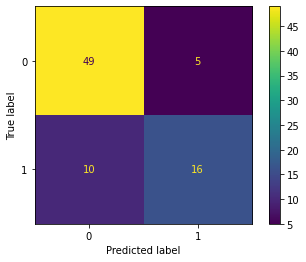

In [20]:
metrics.plot_confusion_matrix(svc, X_test, y_test);

**Visualising the Training set results**

**Visualising the Test set results**